In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from helper_functions import plot_decision_boundary

In [3]:
def get_device():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    return device

In [10]:
def get_data(device):
    num_samples=1000
    X, y = make_circles(num_samples, noise=0.01, random_state=145)
    X = torch.from_numpy(X).type(torch.float)
    y = torch.from_numpy(y).type(torch.float)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=145)
    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)
    return X_train, X_test, y_train, y_test

In [14]:
class CM(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu=nn.ReLU()
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [8]:
def accuracy_fn(y_pred, y_true):
    correct = torch.eq(y_pred, y_true).sum().item()
    accuracy = (correct/len(y_pred)) * 100.0
    return accuracy

In [18]:
epochs=800
model=CM()
torch.manual_seed(145)
device = get_device()
X_train, X_test, y_train, y_test = get_data(device)
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(), lr=0.1)

for epoch in range(epochs):
    model.train()
    train_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(train_logits))
    loss = loss_fn(train_logits, y_train)
    accuracy = accuracy_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        y_pred = torch.round(torch.sigmoid(test_logits))
        loss = loss_fn(test_logits, y_test)
        accuracy = accuracy_fn(y_pred, y_test)
    
    print(accuracy)

50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.5
52.0
55.00000000000001
56.00000000000001
56.49999999999999
56.49999999999999
56.49999999999999
55.50000000000001
55.50000000000001
54.0
53.5
54.0
54.0
52.5
53.0
52.5
52.5
52.0
52.5
53.0
53.5
54.50000000000001
55.50000000000001
56.99999999999999
56.99999999999999
57.49999999999999
57.49999999999999
58.5
58.5
58.5
58.5
58.5
58.5
58.5
58.5
58.5
59.0
58.5
57.99999999999999
57.99999999999999
57.99999999999999
58.5
58.5
58.5
58.5
58.5
59.0
59.0
60.0
60.0
60.0
61.0
61.0
62.0
62.0
62.0
62.0
62.0
63.0
63.0
63.5
63.5
65.0
65.5
66.0
66.0
66.0
67.0
67.5
68.0
68.0
68.5
68.5
68.5
69.0
69.5
69.5
69.5
70.0
69.5
69.5
70.5
70.5
70.5
70.5
70.5
70.5
70.5
70.5
71.0
71.0
71.0
71.0
71.0
71.0
71.0
71.0
71.5
71.5
71.5
71.5
71.5
71.5
71.5
71.5
71.5
71.5
71.5
71.5
71.5
71.5
71.5
72.0
72.0
72.0
72.0
72.5
72.5
72.5
72

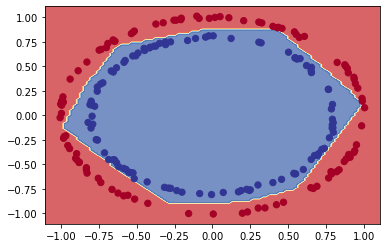

In [19]:
# Make predictions
model.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

plot_decision_boundary(model, X_test, y_test) # model_3 = has non-linearity